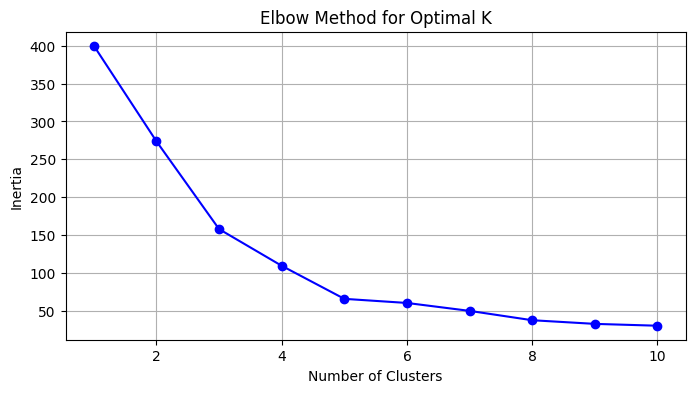

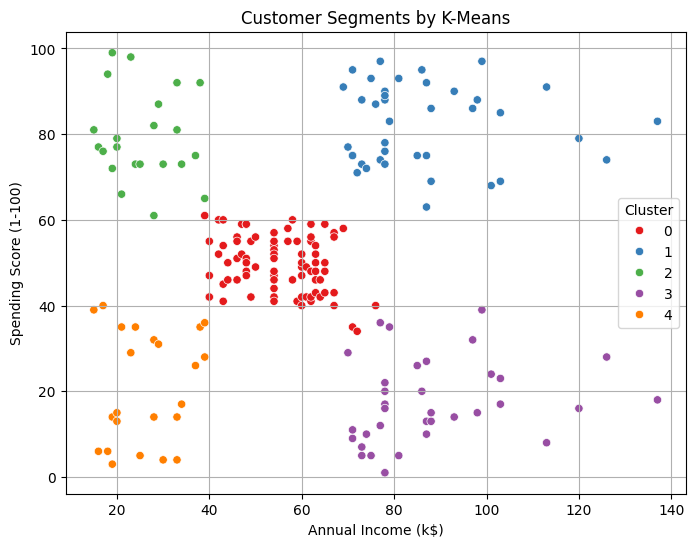

Silhouette Score: 0.55


In [1]:
# Clustering with K-Means on Mall_Customers dataset

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Adjust path if needed
df.head()

# Step 3: Data preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Selecting relevant features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Step 5: Fit K-Means with optimal K (e.g., K=5 based on elbow curve)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments by K-Means')
plt.grid(True)
plt.show()

# Step 7: Evaluate using Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")
